In [20]:
import numpy as np
import pandas as pd
import pickle as pk
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.linear_model import LogisticRegressionCV

In [46]:
input_data = pk.load(open('input_data.pkl', 'rb'))
target_data = pk.load(open('target_data.pkl', 'rb'))

layers = []
dimention = []
score = []

for lay in range(1,9):
    for dim in np.power(2, np.arange(12)):
        print(lay, dim)
        scores = []
        for i in range(5):
            log_input = []
            rand_lstm = Sequential()
            rand_lstm.add(LSTM(dim, activation='relu', return_sequences=True, input_shape=(1, input_data[0].shape[1])))
            for l in range(lay-1):
                rand_lstm.add(LSTM(dim, activation='relu', return_sequences=True))
            rand_lstm.compile(optimizer='adam', loss='mse')
            for input_batch in input_data:
                input_batch = input_batch.reshape(input_batch.shape[0], 1, input_batch.shape[1])
                batch_out = rand_lstm.predict(input_batch)
                log_input.append(batch_out[-1,:][0])
                rand_lstm.reset_states()
            print("made data")
            log_input = np.stack(log_input)
            cvlr = LogisticRegressionCV(Cs=1, cv=10, scoring='roc_auc', max_iter=10000)
            each_score = []
            for t in np.array(target_data).T:
                t = t.astype('int')
                cvlr.fit(log_input, t)
                each_score.append(np.mean(cvlr.scores_[1]))
            scores.append(np.mean(each_score))
        layers.append(lay)
        dimention.append(dim)
        score.append(np.mean(scores))

1 1
made data
made data
made data
made data
made data
1 2
made data
made data
made data
made data
made data
1 4
made data
made data
made data
made data
made data
1 8
made data
made data
made data
made data
made data
1 16
made data
made data
made data
made data
made data
1 32
made data
made data
made data
made data
made data
1 64
made data
made data
made data
made data
made data
1 128
made data
made data
made data
made data
made data
1 256
made data
made data
made data
made data
made data
1 512
made data
made data
made data
made data
made data
1 1024
made data
made data
made data
made data
made data
1 2048
made data
made data
made data
made data
made data
2 1
made data
made data
made data
made data
made data
2 2
made data
made data
made data
made data
made data
2 4
made data
made data
made data
made data
made data
2 8
made data
made data
made data
made data
made data
2 16
made data
made data
made data
made data
made data
2 32
made data
made data
made data
made data
made data
2 64
made d

ResourceExhaustedError: OOM when allocating tensor with shape[2048,8192] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node lstm_711/random_uniform/RandomUniform (defined at C:\Users\Ethan\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4357) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Original stack trace for 'lstm_711/random_uniform/RandomUniform':
  File "C:\Users\Ethan\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Ethan\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\Ethan\Anaconda3\lib\asyncio\base_events.py", line 539, in run_forever
    self._run_once()
  File "C:\Users\Ethan\Anaconda3\lib\asyncio\base_events.py", line 1775, in _run_once
    handle._run()
  File "C:\Users\Ethan\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2854, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2880, in _run_cell
    return runner(coro)
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3057, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3248, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-46-407ecedad461>", line 17, in <module>
    rand_lstm.add(LSTM(dim, activation='relu', return_sequences=True))
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\keras\engine\sequential.py", line 182, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\keras\layers\recurrent.py", line 541, in __call__
    return super(RNN, self).__call__(inputs, **kwargs)
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 463, in __call__
    self.build(unpack_singleton(input_shapes))
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\keras\layers\recurrent.py", line 502, in build
    self.cell.build(step_input_shape)
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\keras\layers\recurrent.py", line 1919, in build
    constraint=self.kernel_constraint)
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 279, in add_weight
    weight = K.variable(initializer(shape, dtype=dtype),
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\keras\initializers.py", line 227, in __call__
    dtype=dtype, seed=self.seed)
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py", line 4357, in random_uniform
    shape, minval=minval, maxval=maxval, dtype=dtype, seed=seed)
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\tensorflow\python\keras\backend.py", line 5253, in random_uniform
    shape, minval=minval, maxval=maxval, dtype=dtype, seed=seed)
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\tensorflow\python\ops\random_ops.py", line 247, in random_uniform
    rnd = gen_random_ops.random_uniform(shape, dtype, seed=seed1, seed2=seed2)
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_random_ops.py", line 859, in random_uniform
    name=name)
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "C:\Users\Ethan\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


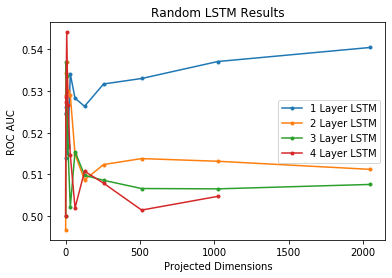

In [48]:
plt.figure()
for i in range(4):
    plt.plot(dimention[i*12:i*12+12], score[i*12:i*12+12], marker='.', label=f'{i+1} Layer LSTM')
plt.xlabel('Projected Dimensions')
plt.ylabel('ROC AUC')
plt.title('Random LSTM Results')
plt.legend()
plt.show()